<4/27/2024> - <angort8476>

In [1]:
import pandas as pd
file_path ='C:\\Users\\student\\Documents\\week4\\Stroke_Prediction_Dataset.xlsx'
df = pd.read_excel(file_path)

df_work = pd.get_dummies(df['Work Type'], dtype=int)
df_gender = pd.get_dummies(df['Gender'], dtype=int)
df_diagnosis = pd.get_dummies(df['Diagnosis'], dtype=int)
new_diagnosis = df['Diagnosis']
print(df_work)
print(df_gender)
print(df_diagnosis)

       Government Job  Never Worked  Private  Self-employed
0                   1             0        0              0
1                   1             0        0              0
2                   1             0        0              0
3                   1             0        0              0
4                   1             0        0              0
...               ...           ...      ...            ...
14995               0             0        0              1
14996               0             0        0              1
14997               0             0        0              1
14998               0             0        0              1
14999               0             0        0              1

[15000 rows x 4 columns]
       Female  Male
0           1     0
1           1     0
2           0     1
3           1     0
4           0     1
...       ...   ...
14995       0     1
14996       0     1
14997       0     1
14998       1     0
14999       0     1

[15000 rows x

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, Markdown
import seaborn as sns
import numpy as np
todays_date = datetime.now().strftime("%Y-%m-%d")
student_id = "angort8476"
# Step 1: Data Preprocessing
# ---------------------------
# Specify which columns will be used as features and which one will be the target.
X_class = df.drop(['Patient ID', 'Patient Name', 'Gender', 'Marital Status', 'Work Type', 'Residence Type', 'Smoking Status',
                  'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Diagnosis'], axis=1)
y_class = new_diagnosis
# Split the dataset into 80% training and 20% testing
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
X_train_class = X_train_class.fillna(1)
y_train_class = y_train_class.fillna(1)
X_test_class = X_test_class.fillna(1)
y_test_class = y_test_class.fillna(1)
# Show the features and target
display(Markdown(f"### {student_id} - {todays_date}"))
display(Markdown("#### Features"))
display(X_class.head())
display(y_class.head())

### angort8476 - 2024-04-27

#### Features

,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels,Systolic Blood Pressure,Diastolic Blood Pressure,HDL Cholesterol,...,Dizziness,Seizures,Weakness,Severe Fatigue,Headache,Confusion,Difficulty Speaking,Numbness,Loss of Balance,Unnamed: 34
0,61,0,1,194.73,26.44,1,5.85,179,72,66,...,0,0,0,0,0,0,0,0,1,NaN
1,30,0,1,163.15,19.36,0,9.19,114,67,80,...,0,0,0,0,0,0,0,1,1,7468.0
2,86,0,1,130.71,31.83,0,3.77,151,97,52,...,0,0,0,0,0,1,1,0,0,NaN
3,40,0,1,199.01,31.22,1,0.82,120,60,58,...,0,1,0,0,0,1,0,0,0,NaN
4,57,0,1,76.30,29.44,0,2.85,101,69,33,...,0,0,0,1,0,1,0,0,1,NaN


0    Stroke
1    Stroke
2    Stroke
3    Stroke
4    Stroke
Name: Diagnosis, dtype: object

In [3]:
# Initialize and train the models
logistic_model = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
# Train the models
logistic_model.fit(X_train_class, y_train_class)
rf_classifier.fit(X_train_class, y_train_class)
svm_classifier.fit(X_train_class, y_train_class)
# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_class)
y_pred_rf = rf_classifier.predict(X_test_class)
y_pred_svm = svm_classifier.predict(X_test_class)
# Calculate and display training accuracy for each model
training_accuracy_logistic = accuracy_score(y_train_class,
logistic_model.predict(X_train_class))
training_accuracy_rf = accuracy_score(y_train_class,
rf_classifier.predict(X_train_class))
training_accuracy_svm = accuracy_score(y_train_class,
svm_classifier.predict(X_train_class))
# Add predictions to the test set DataFrame
X_test_class['Predicted_Logistic'] = y_pred_logistic
X_test_class['Predicted_RF'] = y_pred_rf
X_test_class['Predicted_SVM'] = y_pred_svm
display(Markdown(f"### {student_id} - {todays_date}"))
display(Markdown(f"Training Accuracy for Logistic Regression: {training_accuracy_logistic:.2f}"))
display(Markdown(f"Training Accuracy for Random Forest: {training_accuracy_rf:.2f}"))
display(Markdown(f"Training Accuracy for SVM: {training_accuracy_svm:.2f}"))

### angort8476 - 2024-04-27

Training Accuracy for Logistic Regression: 0.52

Training Accuracy for Random Forest: 1.00

Training Accuracy for SVM: 0.52

### angort8476 - 2024-04-27

#### Confusion Matrix for Logistic Regression

array([[799, 699],
       [835, 667]], dtype=int64)

#### Confusion Matrix for Random Forest

array([[843, 655],
       [798, 704]], dtype=int64)

#### Confusion Matrix for SVM

array([[872, 626],
       [907, 595]], dtype=int64)

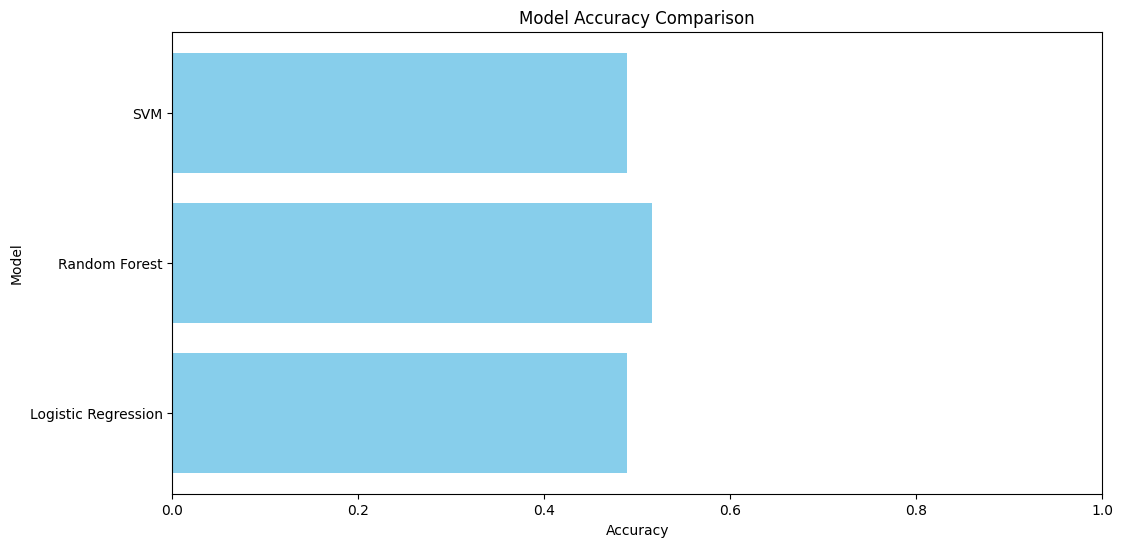

In [4]:
# Calculate accuracy and F1-Score
accuracy_logistic = accuracy_score(y_test_class, y_pred_logistic)
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
accuracy_svm = accuracy_score(y_test_class, y_pred_svm)
f1_logistic = f1_score(y_test_class, y_pred_logistic, average='weighted')
f1_rf = f1_score(y_test_class, y_pred_rf, average='weighted')
f1_svm = f1_score(y_test_class, y_pred_svm, average='weighted')
# Create Confusion Matrices
conf_matrix_logistic = confusion_matrix(y_test_class, y_pred_logistic)
conf_matrix_rf = confusion_matrix(y_test_class, y_pred_rf)
conf_matrix_svm = confusion_matrix(y_test_class, y_pred_svm)
# Display Confusion Matrices
display(Markdown(f"### {student_id} - {todays_date}"))
display(Markdown("#### Confusion Matrix for Logistic Regression"))
display(conf_matrix_logistic)
display(Markdown("#### Confusion Matrix for Random Forest"))
display(conf_matrix_rf)
display(Markdown("#### Confusion Matrix for SVM"))
display(conf_matrix_svm)
# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
'Accuracy': [accuracy_logistic, accuracy_rf, accuracy_svm],
'F1 Score': [f1_logistic, f1_rf, f1_svm]
})
# Create a bar plot using Matplotlib
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [accuracy_logistic, accuracy_rf, accuracy_svm]
plt.figure(figsize=(12, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()

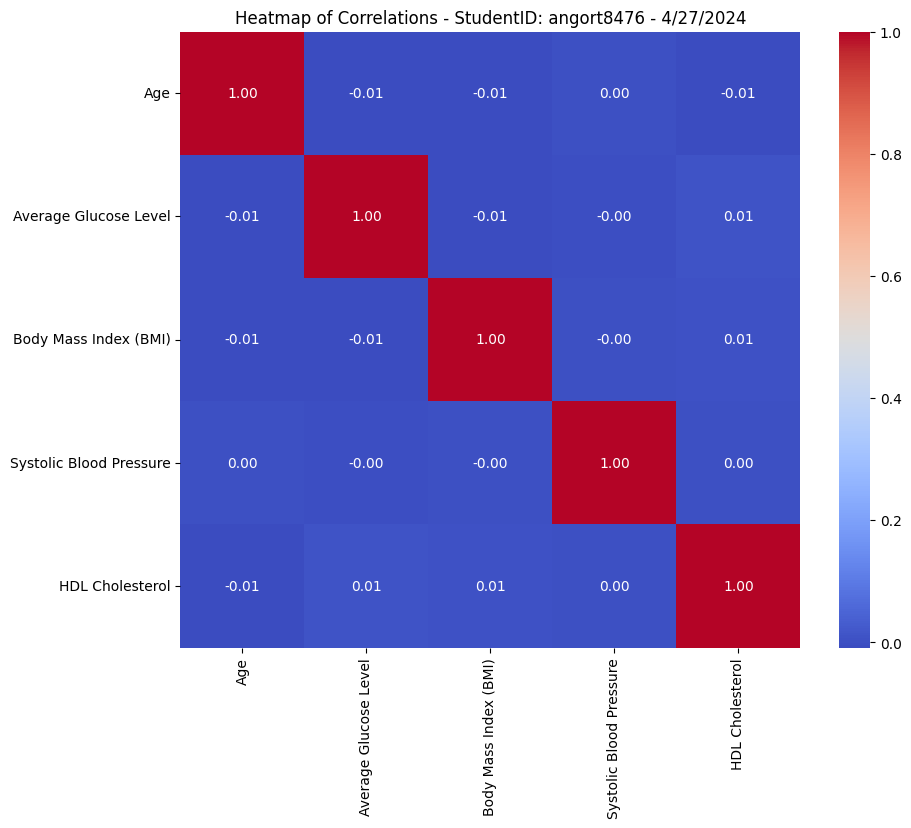

In [5]:
selected_columns = ['Age', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Systolic Blood Pressure', 'HDL Cholesterol']
correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
fmt=".2f")
plt.title(f'Heatmap of Correlations - StudentID: angort8476 - 4/27/2024')
plt.show()